### Problem 1: Correlations in AR models

### Writing a Function for AR(p) Model Simulation

Firstly, I created a function called simulate_ar_process to model AR(p) processes. It requires the AR coefficients, an intercept, the sample size, and a burnin period to omit early values influenced by initial conditions. This function uses statsmodels to generate the series with a standardized white noise.

In [ ]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(101)

def simulate_ar_process(phi, c, n, burnin):
    ar_params = np.r_[1, -np.array(phi)]
    ma_params = np.array([1])
    return arma_generate_sample(ar=ar_params, ma=ma_params, nsample=n + burnin)[burnin:] + c


### Simulating AR(1) Model and Calculating ACF and PACF


I simulated an AR(1) model with a coefficient of -0.6 and an intercept of 18, generating 5,000 observations. After plotting the data, I calculated the ACF and PACF to understand the model's time-series behavior.

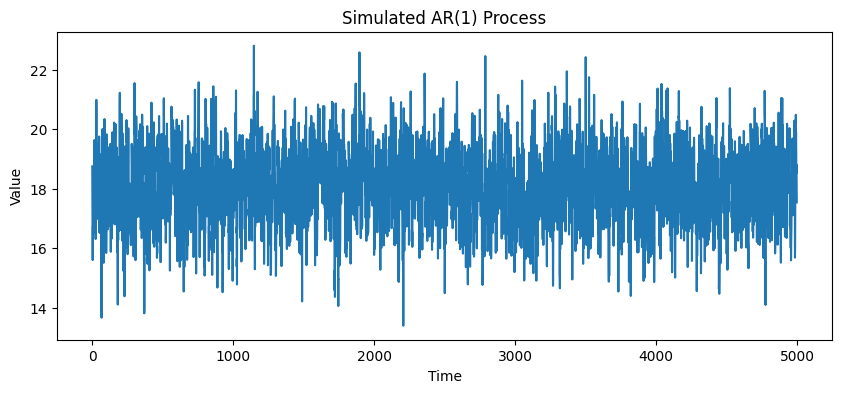

<ipython-input-2-38ee6d774c41>:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_values_ar1, use_line_collection=True)


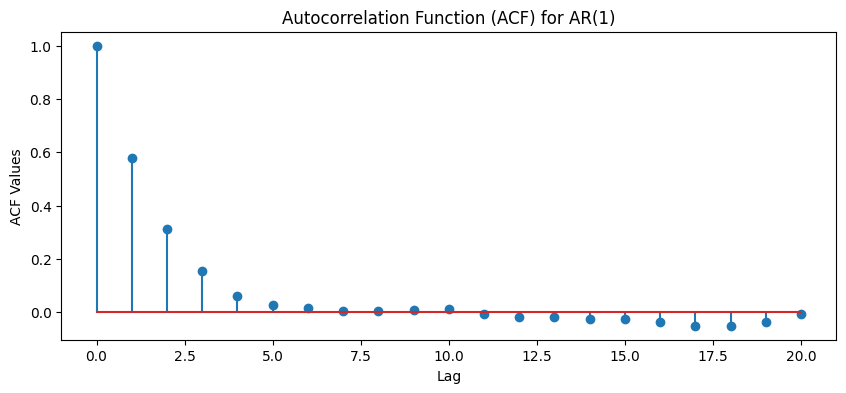

<ipython-input-2-38ee6d774c41>:36: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values_ar1, use_line_collection=True)


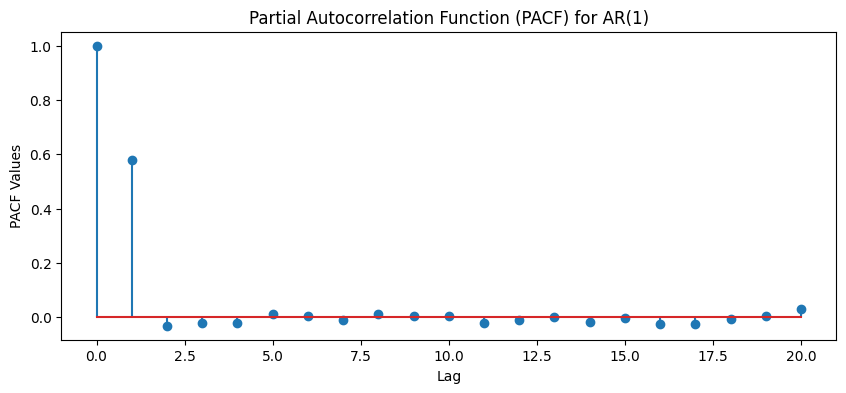

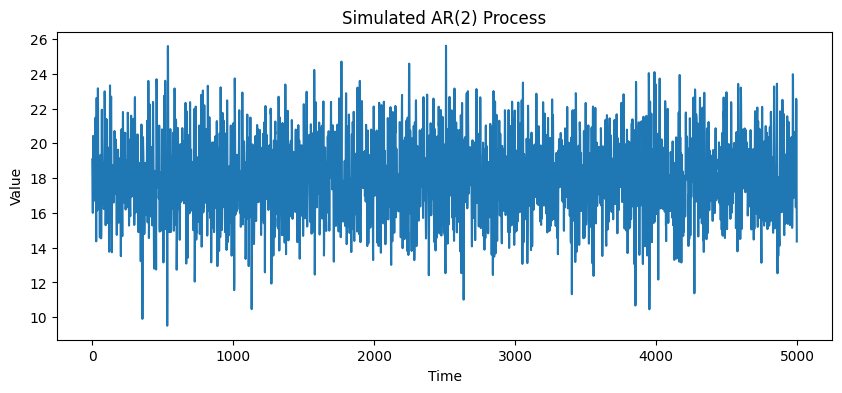

<ipython-input-2-38ee6d774c41>:61: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_values_ar2, use_line_collection=True)


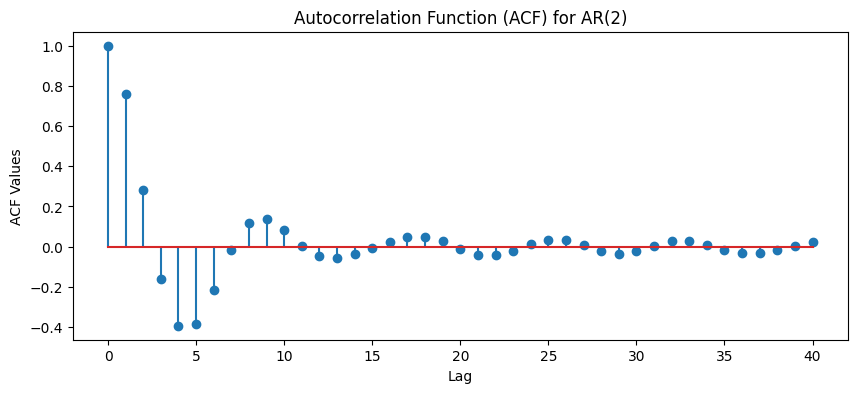

<ipython-input-2-38ee6d774c41>:71: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values_ar2, use_line_collection=True)


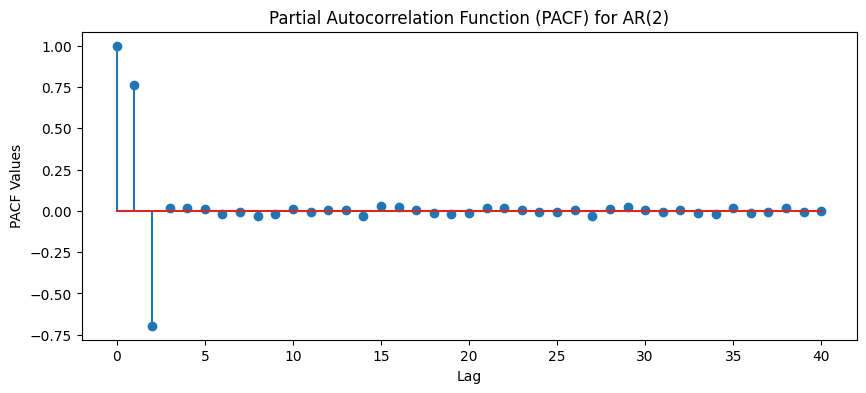

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Setting seed for reproducibility
np.random.seed(101)

# Parameters for AR(1)
phi_ar1 = [0.6]  # Coefficient for AR(1) model
c = 18  # Intercept for AR(1) model
n = 5000  # Number of samples
burnin = 100  # Burn-in period

# Simulate AR(1) process
ar1_data = simulate_ar_process(phi_ar1, c, n, burnin)

# Plotting the AR(1) time series
plt.figure(figsize=(10, 4))
plt.plot(ar1_data)
plt.title('Simulated AR(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Calculating and plotting ACF and PACF for AR(1)
acf_values_ar1 = acf(ar1_data, nlags=20)
pacf_values_ar1 = pacf(ar1_data, nlags=20, method='ols')

plt.figure(figsize=(10, 4))
plt.stem(acf_values_ar1, use_line_collection=True)
plt.title('Autocorrelation Function (ACF) for AR(1)')
plt.xlabel('Lag')
plt.ylabel('ACF Values')
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(pacf_values_ar1, use_line_collection=True)
plt.title('Partial Autocorrelation Function (PACF) for AR(1)')
plt.xlabel('Lag')
plt.ylabel('PACF Values')
plt.show()

# Parameters for AR(2)
phi_ar2 = [1.3, -0.7]  # Coefficients for AR(2) model
c_ar2 = 8  # Intercept for AR(2) model

# Simulate AR(2) process
ar2_data = simulate_ar_process(phi_ar2, c, n, burnin)

# Plotting the time series for AR(2)
plt.figure(figsize=(10, 4))
plt.plot(ar2_data)
plt.title('Simulated AR(2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Calculating and plotting ACF for AR(2)
acf_values_ar2 = acf(ar2_data, nlags=40)

plt.figure(figsize=(10, 4))
plt.stem(acf_values_ar2, use_line_collection=True)
plt.title('Autocorrelation Function (ACF) for AR(2)')
plt.xlabel('Lag')
plt.ylabel('ACF Values')
plt.show()

# Calculating and plotting PACF for AR(2)
pacf_values_ar2 = pacf(ar2_data, nlags=40, method='ols')

plt.figure(figsize=(10, 4))
plt.stem(pacf_values_ar2, use_line_collection=True)
plt.title('Partial Autocorrelation Function (PACF) for AR(2)')
plt.xlabel('Lag')
plt.ylabel('PACF Values')
plt.show()


### Exploring Stationarity and Non-Stationarity in AR(1) Model

I examined stationarity in AR(1) processes with varying coefficients, testing values below -1 to assess their impact on the time series' stability.


In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data, title='ADF Test Result'):
    result = adfuller(data)
    print(f'{title}')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: %.3f' % value)
    print('\n')

# Simulating AR(1) process for different phi values and checking stationarity
phi_values = [-0.7, -0.8, -0.9, 1.1]  # Including a value > 1 for non-stationarity demonstration
for phi_value in phi_values:
    data = simulate_ar_process([phi_value], c, n, burnin)
    result = adfuller(data)
    print(f'Results of Dickey-Fuller Test for phi={phi_value}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

    # Stationarity interpretation
    if result[0] < result[4]["5%"]:
        print("Conclusion: The series is stationary at 5% significance level.\n")
    else:
        print("Conclusion: The series is not stationary.\n")


Results of Dickey-Fuller Test for phi=-0.7:
ADF Statistic: -170.31683112639928
p-value: 0.0
Critical Value (1%): -3.431658793968827
Critical Value (5%): -2.862118345383404
Critical Value (10%): -2.567077853953267
Conclusion: The series is stationary at 5% significance level.

Results of Dickey-Fuller Test for phi=-0.8:
ADF Statistic: -213.60734988798134
p-value: 0.0
Critical Value (1%): -3.431658793968827
Critical Value (5%): -2.862118345383404
Critical Value (10%): -2.567077853953267
Conclusion: The series is stationary at 5% significance level.

Results of Dickey-Fuller Test for phi=-0.9:
ADF Statistic: -50.54687593286497
p-value: 0.0
Critical Value (1%): -3.431659318070175
Critical Value (5%): -2.862118576928539
Critical Value (10%): -2.567077977213785
Conclusion: The series is stationary at 5% significance level.

Results of Dickey-Fuller Test for phi=1.1:
ADF Statistic: nan
p-value: nan
Critical Value (1%): -3.431658793968827
Critical Value (5%): -2.862118345383404
Critical Value 

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:954: RuntimeWarning: overflow encountered in square
  ssr = np.sum(resid**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


The Augmented Dickey-Fuller test results confirm what is expected for AR(1) processes: the time series are stationary when the autoregressive coefficient is less than 1 in absolute value. This means the values in the series do not depend on a trend over time. However, when the coefficient's absolute value is greater than 1, the series becomes non-stationary, indicating the presence of trends or other structures that evolve over time.

### Simulation and Analysis of AR(2) Model

Next, I ran a simulation for an AR(2) model with coefficients 1.3 and -0.7, and an intercept of 8, creating a series of 5,000 points. Visual comparison of PACF plots helped distinguish this from the AR(1) model.

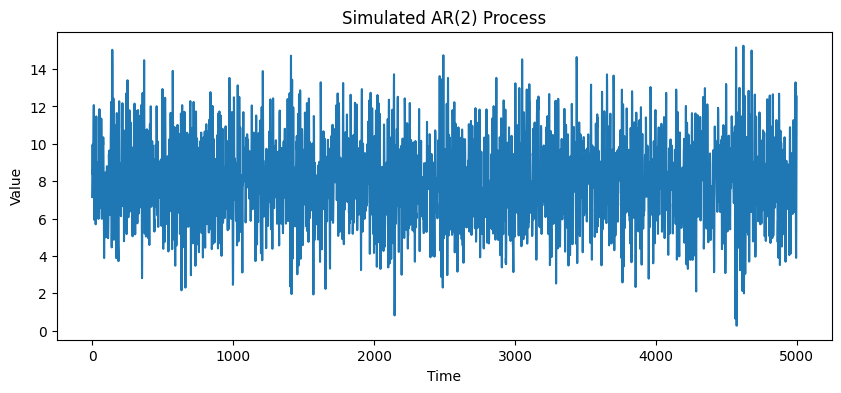

<ipython-input-4-c1b08561acc7>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values_ar1, use_line_collection=True)
<ipython-input-4-c1b08561acc7>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values_ar2, use_line_collection=True)


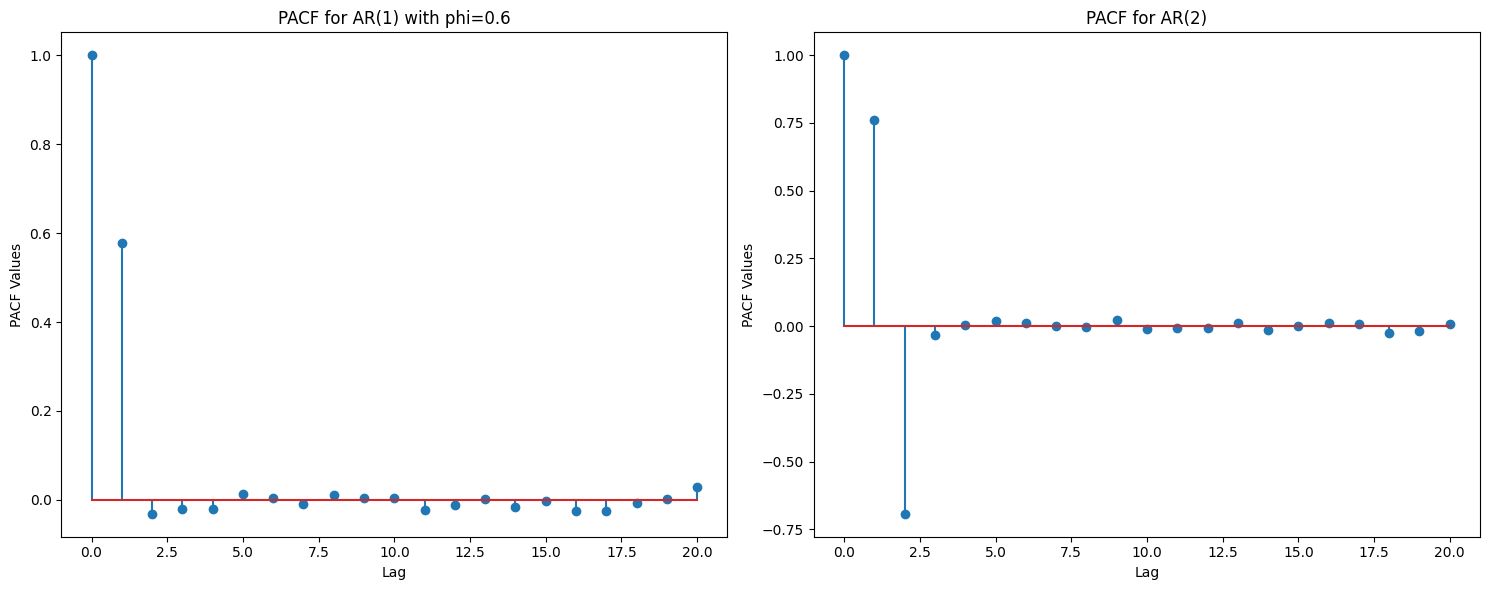

In [ ]:
# Simulate AR(2) process
phi_ar2 = [1.3, -0.7]
c_ar2 = 8
ar2_data = simulate_ar_process(phi_ar2, c_ar2, n, burnin)

# Plotting the time series for AR(2)
plt.figure(figsize=(10, 4))
plt.plot(ar2_data)
plt.title('Simulated AR(2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Computing PACF for AR(2)
pacf_values_ar2 = pacf(ar2_data, nlags=20, method='ols')

# Plotting PACF for AR(1) and AR(2) for comparison
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.stem(pacf_values_ar1, use_line_collection=True)
plt.title('PACF for AR(1) with phi=0.6')
plt.xlabel('Lag')
plt.ylabel('PACF Values')
plt.subplot(122)
plt.stem(pacf_values_ar2, use_line_collection=True)
plt.title('PACF for AR(2)')
plt.xlabel('Lag')
plt.ylabel('PACF Values')
plt.tight_layout()
plt.show()


The Partial Autocorrelation Function (PACF) plots for the first-order and second-order autoregressive processes illustrate key diagnostic features. For the first-order process, the PACF cuts off after the first lag, which signifies that only the immediate past value has a significant influence on the current value. For the second-order process, the PACF shows significance at the first two lags and then cuts off, indicating that the current value is influenced by the two immediate past values.

### Problem 2: Correlations in MA models

### Writing a Function for MA(q) Model Simulation

I developed a simulate_ma_process function for generating MA(q) models, specifying MA coefficients, sample size, and a burnin period to temper early data fluctuations, with white noise standardized to a mean of zero and unit variance.


In [ ]:
def simulate_ma_process(theta, c, n, burnin):
    ma_params = np.r_[1, np.array(theta)]
    ar_params = np.array([1])
    return arma_generate_sample(ar=ar_params, ma=ma_params, nsample=n + burnin)[burnin:] + c


### Simulating MA(1) Model and Calculating ACF and PACF

I then simulated an MA(1) process with a coefficient of 0.8 and an intercept of 20, generating 5,000 values. Following the generation of the time series, I computed the ACF and PACF for the series to inspect its underlying structure.


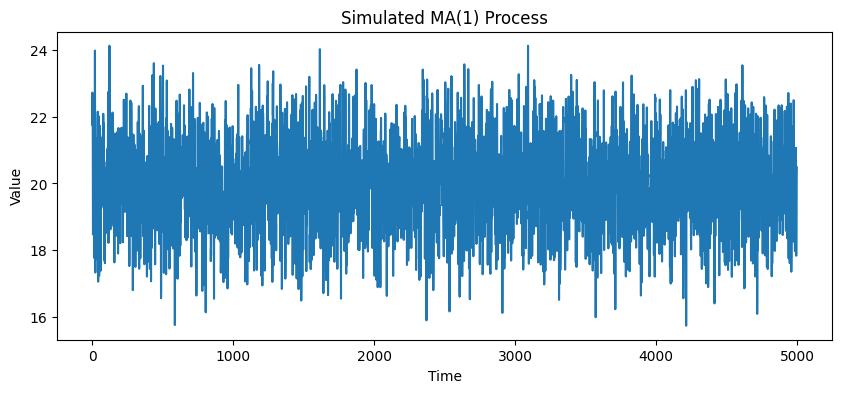

<ipython-input-6-58bf2f478f23>:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_values_ma1, use_line_collection=True)


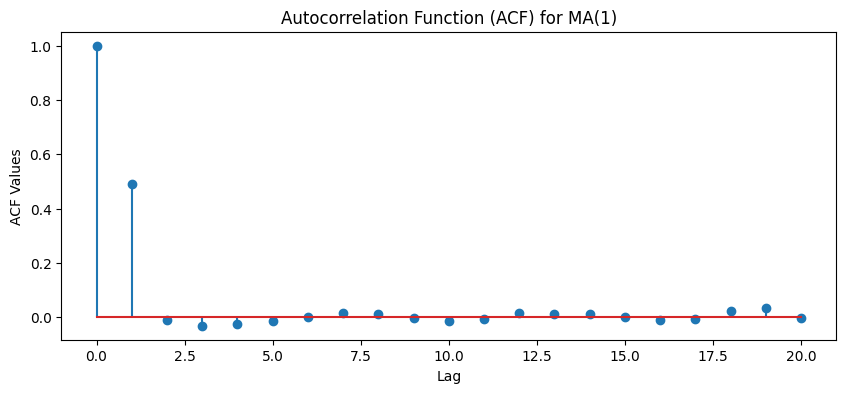

<ipython-input-6-58bf2f478f23>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values_ma1, use_line_collection=True)


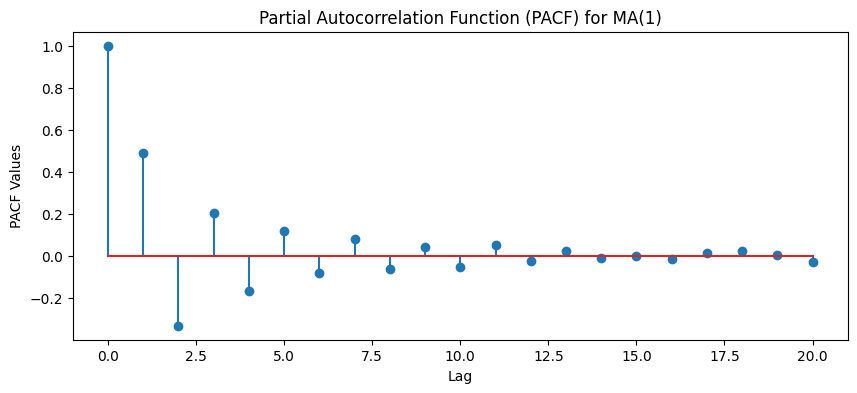

In [ ]:
# Parameters for MA(1)
theta = [0.8]
c_ma = 20

# Simulate MA(1) process
ma1_data = simulate_ma_process(theta, c_ma, n, burnin)

# Plotting the time series for MA(1)
plt.figure(figsize=(10, 4))
plt.plot(ma1_data)
plt.title('Simulated MA(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Computing ACF and PACF for MA(1)
acf_values_ma1 = acf(ma1_data, nlags=20)
pacf_values_ma1 = pacf(ma1_data, nlags=20, method='ols')

# Plotting ACF for MA(1)
plt.figure(figsize=(10, 4))
plt.stem(acf_values_ma1, use_line_collection=True)
plt.title('Autocorrelation Function (ACF) for MA(1)')
plt.xlabel('Lag')
plt.ylabel('ACF Values')
plt.show()

# Plotting PACF for MA(1)
plt.figure(figsize=(10, 4))
plt.stem(pacf_values_ma1, use_line_collection=True)
plt.title('Partial Autocorrelation Function (PACF) for MA(1)')
plt.xlabel('Lag')
plt.ylabel('PACF Values')
plt.show()


### Analyzing the ACF and PACF for MA(2) Model

Similarly, I simulated an MA(2) process with coefficients of -1 and 0.8 to model a more complex dependency structure. As with the MA(1) model, I produced a time series of 5,000 values and then computed the ACF and PACF to examine the effects of the two-lag moving average components.


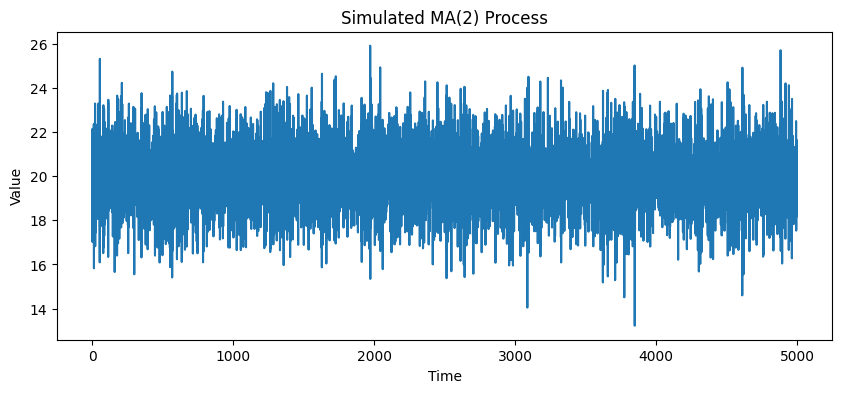

<ipython-input-7-525f47318b1b>:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_values_ma2, use_line_collection=True)


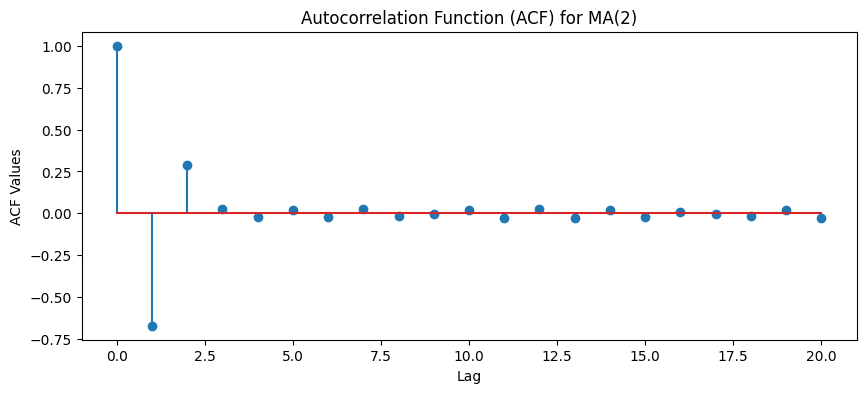

<ipython-input-7-525f47318b1b>:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values_ma2, use_line_collection=True)


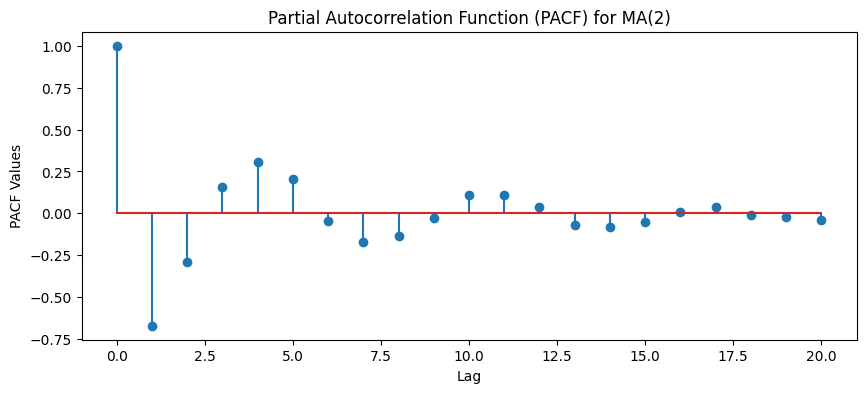

In [ ]:
# Parameters for MA(2)
theta_ma2 = [-1.0, 0.8]

# Simulate MA(2) process
ma2_data = simulate_ma_process(theta_ma2, c_ma, n, burnin)

# Plotting the time series for MA(2)
plt.figure(figsize=(10, 4))
plt.plot(ma2_data)
plt.title('Simulated MA(2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Computing ACF and PACF for MA(2)
acf_values_ma2 = acf(ma2_data, nlags=20)
pacf_values_ma2 = pacf(ma2_data, nlags=20, method='ols')

# Plotting ACF for MA(2)
plt.figure(figsize=(10, 4))
plt.stem(acf_values_ma2, use_line_collection=True)
plt.title('Autocorrelation Function (ACF) for MA(2)')
plt.xlabel('Lag')
plt.ylabel('ACF Values')
plt.show()

# Plotting PACF for MA(2)
plt.figure(figsize=(10, 4))
plt.stem(pacf_values_ma2, use_line_collection=True)
plt.title('Partial Autocorrelation Function (PACF) for MA(2)')
plt.xlabel('Lag')
plt.ylabel('PACF Values')
plt.show()


### Comparing ACF/PACF for AR and MA Models

The autocorrelation (ACF) and partial autocorrelation (PACF) plots for AR and MA models reveal distinct characteristics that can guide the identification of the appropriate model for a given time series.

For AR models, the PACF exhibits a sharp cut-off after the order of the model, while the ACF shows a more gradual decline. This pattern suggests a direct relationship only between the current value and a fixed number of prior values, with diminishing influence from further back in the series.

In contrast, MA models display a sharp cut-off in the ACF after the order of the model, with the PACF declining more gradually. This implies that the current value is directly influenced by a fixed number of white noise shocks from previous periods, without sustained direct influence from earlier observations.

These differing patterns of decay and truncation in the ACF and PACF plots are critical for diagnosing the underlying process governing the time series. AR processes hint at a continuing effect from past values, while MA processes point to a transient effect from past shocks. This knowledge is pivotal when choosing between AR and MA models for forecasting and analysis in time series data.
